In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_excel('/content/Global_Superstore2.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
# membuang postal code
data = data.drop('Postal Code', axis=1)
# membuang null value
df = data.dropna()


In [ ]:
#menghapus kolom-kolom yang tidak digunakan dalam proses klustering
New_data = df.drop(['Row ID','Order Date','Order ID','Ship Date','Customer ID','Customer Name','Product ID','Product Name', 'Market','City','State','Country', 'Region','Sub-Category'], axis=1)

In [ ]:
New_data.head()

,Ship Mode,Segment,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,Consumer,Technology,2309.650,7.0,0.0,762.1845,933.57,Critical
1,Second Class,Corporate,Furniture,3709.395,9.0,0.1,-288.7650,923.63,Critical
2,First Class,Consumer,Technology,5175.171,9.0,0.1,919.9710,915.49,Medium
3,First Class,Home Office,Technology,2892.510,5.0,0.1,-96.5400,910.16,Medium
4,Same Day,Consumer,Technology,2832.960,8.0,0.0,311.5200,903.04,Critical


In [ ]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51284 entries, 0 to 51289
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51284 non-null  object 
 1   Segment         51284 non-null  object 
 2   Category        51284 non-null  object 
 3   Sales           51284 non-null  float64
 4   Quantity        51284 non-null  float64
 5   Discount        51284 non-null  float64
 6   Profit          51284 non-null  float64
 7   Shipping Cost   51284 non-null  float64
 8   Order Priority  51284 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.9+ MB


In [ ]:
#melihat data unik setiap data kategorik

#ship mode
Ship_mode = New_data['Ship Mode'].unique()
print('data unik Ship Mode')
print(Ship_mode)
print(' ')

#Segment
Segment = New_data['Segment'].unique()
print('data unik Segment')
print(Segment)
print(' ')

#ship Category
Category = New_data['Category'].unique()
print('data unik Category')
print(Category)
print(' ')

#Order Priority
Orde_priority = New_data['Order Priority'].unique()
print('data unik Order Priority')
print(Orde_priority)
print(' ')

data unik Ship Mode
['Same Day' 'Second Class' 'First Class' 'Standard Class']
 
data unik Segment
['Consumer' 'Corporate' 'Home Office']
 
data unik Category
['Technology' 'Furniture' 'Office Supplies']
 
data unik Order Priority
['Critical' 'Medium' 'High' 'Low']
 


# Encoding data kategori

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#membagi data kategorik dan data numerik
data_num = New_data[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]
data_cat = New_data[['Ship Mode','Segment', 'Category','Order Priority']]

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder()

# Melakukan encoding terhadap variabel kategorikal
encoded_data = encoder.fit_transform(New_data[['Ship Mode', 'Segment',  'Category', 'Order Priority']])

# Mengonversi hasil encoding menjadi DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Ship Mode', 'Segment','Category','Order Priority']))

In [ ]:
encoded_df.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
#mengabungkan kembali data numerik dan data kategor9
encoded_df = encoded_df.reset_index(drop=True)
data_num = data_num.reset_index(drop=True)

data_ready = pd.concat([encoded_df, data_num], axis=1)
data_ready

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2309.650,7.0,0.0,762.1845,933.57
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3709.395,9.0,0.1,-288.7650,923.63
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5175.171,9.0,0.1,919.9710,915.49
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2892.510,5.0,0.1,-96.5400,910.16
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2832.960,8.0,0.0,311.5200,903.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,65.100,5.0,0.0,4.5000,0.01
51280,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.444,1.0,0.8,-1.1100,0.01
51281,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.920,3.0,0.0,11.2308,0.01
51282,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.440,2.0,0.0,2.4000,0.00


# mencari total k, menggunakan elbow method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

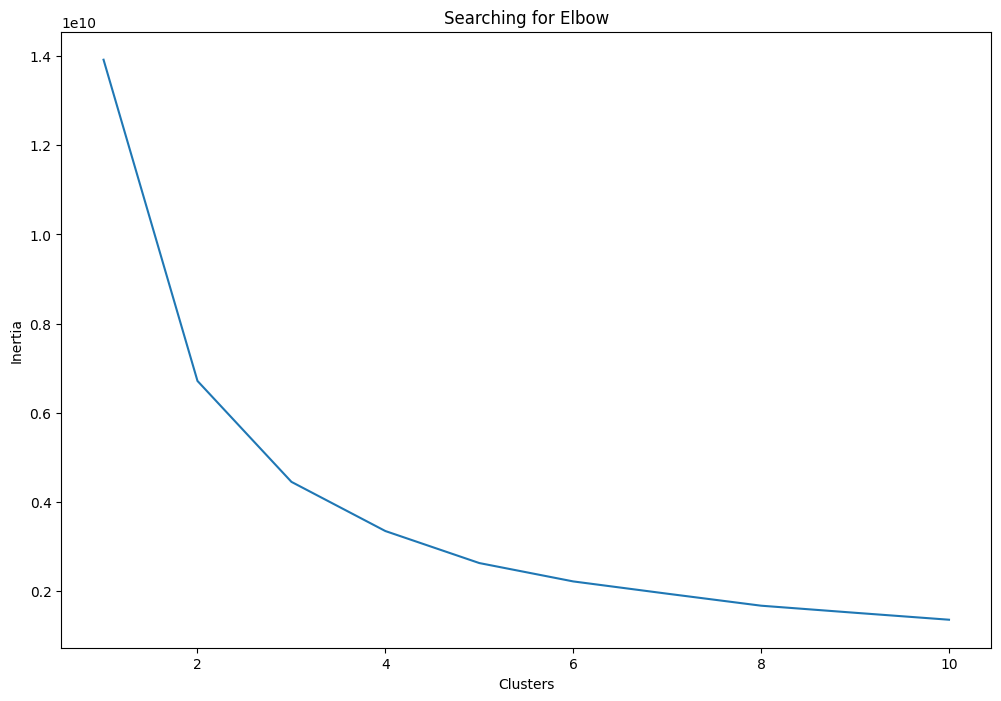

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data_ready)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

dari kedua metode untuk mencari total kluster di dapatkan total kluster yang mungkin di pakai dalam model klustering adalah berjumlah 4

# klustering model menggunkan K-means


In [ ]:
kmeans = KMeans(n_clusters=4).fit(data_ready)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
km = data_ready.copy()
km.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2309.650,7.0,0.0,762.1845,933.57
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3709.395,9.0,0.1,-288.7650,923.63
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5175.171,9.0,0.1,919.9710,915.49
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2892.510,5.0,0.1,-96.5400,910.16
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2832.960,8.0,0.0,311.5200,903.04


In [ ]:
km['Labels'] = kmeans.labels_
km

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost,Labels
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2309.650,7.0,0.0,762.1845,933.57,3
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3709.395,9.0,0.1,-288.7650,923.63,3
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5175.171,9.0,0.1,919.9710,915.49,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2892.510,5.0,0.1,-96.5400,910.16,3
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2832.960,8.0,0.0,311.5200,903.04,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,65.100,5.0,0.0,4.5000,0.01,0
51280,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.444,1.0,0.8,-1.1100,0.01,0
51281,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.920,3.0,0.0,11.2308,0.01,0
51282,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.440,2.0,0.0,2.4000,0.00,0


In [ ]:
km.groupby('Labels').sum()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost
Labels,,,,,,,,,,,,,,,,,,,
0,6342.0,2278.0,8695.0,26004.0,22451.0,12986.0,7882.0,6909.0,29650.0,6760.0,3282.0,13074.0,2052.0,24911.0,4.402767e+06,139056.0,6531.810,305910.85454,478242.09
1,17.0,3.0,27.0,58.0,49.0,36.0,20.0,21.0,29.0,55.0,8.0,24.0,4.0,69.0,5.845620e+05,806.0,6.510,150428.45300,40195.63
2,946.0,342.0,1323.0,3931.0,3316.0,2026.0,1200.0,2438.0,1333.0,2771.0,536.0,1979.0,318.0,3709.0,4.871380e+06,30225.0,688.008,535787.81184,533310.31
3,199.0,78.0,263.0,778.0,701.0,380.0,237.0,508.0,261.0,549.0,105.0,423.0,48.0,742.0,2.781866e+06,8193.0,102.400,474921.42790,300819.88


In [ ]:
km.describe()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost,Labels
count,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.0000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.000000,51284.00000,51284.000000,51284.000000
mean,0.146322,0.052667,0.200998,0.600012,0.517062,0.300835,0.182104,0.192575,0.6098,0.197625,0.076652,0.302239,0.047227,0.573883,246.481846,3.476328,0.142905,28.60636,26.374072,0.334276
std,0.353433,0.223371,0.400751,0.489900,0.499714,0.458625,0.385934,0.394326,0.4878,0.398212,0.266040,0.459233,0.212127,0.494516,487.591883,2.278720,0.212291,174.35044,57.299646,0.794906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444000,1.000000,0.000000,-6599.97800,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,30.744000,2.000000,0.000000,0.00000,2.610000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,1.000000,85.050000,3.000000,0.000000,9.24000,7.790000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0000,0.000000,0.000000,1.000000,0.000000,1.000000,251.008500,5.000000,0.200000,36.80175,24.442500,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,22638.480000,14.000000,0.850000,8399.97600,933.570000,3.000000


# Karakteristik Setiap kluster

Karakteristik setiap klaster :
0. pada klaster ini shipmode terbanyak pada klas standar, namu pada klaster ini pilihan first klas mode terbanyak dibanding dengan klaster lain, dengan segmentasi pasar yaitu segmentasi korporat, maka dengan demikian kita mengetahui bahwa kategori suply terbanyak adalah office supply, dengan tingkat prioritas nya adalah medium, dengan tingkat penjualan sales termasuk menengah ke bawah, dengan total penjualan terbanyak dan tingkat diskot termasuk dalam penerima tertinggi, dan profit yang di hasilkan termasuk 2 terendah dibandingkan 3 kluster lainnya.
1. pada klaster ini ship mode terbanyak pada kelas standar, kemudian ke dua terbanyak pada mode standar, dengan segmentasi pasar yaitu segmentasi consumer, dengan kategori suply terbanyak adalah kategori technologi, dengan tingkat prioritas nya adalah medium menuju high, dengan tingkat penjualan sales tertinggi, namun dari segi quantity, diskon dan profit merupakan yang paling rendah dibandingkan klaster lain.
2. pada klaster ini tingkatan shipmode adlah  first clas : 946,  same day : 342, second clas: 1323, medium kelas : 3931, dengan segmentasi pasar yaitu segmentasi consumer, maka dengan demikian kita mengetahui bahwa kategori suply terbanyak adalah furnitur, dengan tingkat prioritas nya adalah medium to high, dengan tingkat penjualan termasuk menengah ke atas, dengan total penjualan menengah ke atas dan tingkat diskon termasuk penerima tertinggi, dan profit yang di hasilkan tertinggi3 kluster lainnya.
3. pada klaster ini tingkatan shipmode adlah  first clas : 199,  same day : 78, second clas: 263, medium kelas : 778, dengan segmentasi pasar yaitu segmentasi consumer, maka dengan demikian kita mengetahui bahwa kategori suply terbanyak adalah Technology, dengan tingkat prioritas nya adalah medium to high, dengan tingkat penjualan termasuk terendah di banding klaster lainn, dari segi quantity dan diskon termasuk menegah ke bawah dan profit termasuk dalam karakteristik menengah ke atas



# Rekomendasi bisnis

Klaster 0:
Segmentasi Pasar yang Lebih Mendalam: Identifikasi perusahaan-perusahaan dalam segmen korporat yang membutuhkan kategori supply seperti office supply dengan kualitas dan kehandalan tinggi.
Strategi Penjualan Langsung: Fokus pada penetrasi pasar korporat dengan menjalin hubungan langsung dengan departemen pengadaan perusahaan besar. Tawarkan keunggulan produk dan layanan yang memenuhi kebutuhan khusus mereka.
Program Diskon Volume: Tawarkan diskon tambahan untuk pembelian dalam jumlah besar kepada perusahaan yang menjadi pelanggan tetap. Ini dapat mendorong pembelian lebih lanjut dan memperkuat hubungan dengan pelanggan korporat.
Peningkatan Efisiensi Operasional: Tingkatkan efisiensi dalam rantai pasok Anda untuk mengurangi biaya dan meningkatkan profitabilitas, memperhatikan kebutuhan khusus pelanggan korporat.

Klaster 1:
Pemasaran Berbasis Konten: Buat konten informatif dan edukatif tentang produk teknologi Anda dan manfaatnya bagi konsumen. Sebarkan konten ini melalui blog, video, dan media sosial untuk menarik perhatian konsumen dalam segmen ini.
Promosi dan Penawaran Terbatas: Gunakan strategi penawaran khusus untuk memicu aksi pembelian, seperti penawaran waktu terbatas atau diskon untuk pembelian berikutnya.
Kemitraan dengan Influencer: Gandeng influencer atau ahli teknologi yang memiliki audiens yang relevan dengan segmen konsumen ini. Mereka dapat membantu memperkenalkan produk Anda kepada audiens mereka melalui ulasan atau konten promosi.
Peningkatan Layanan Pelanggan: Berikan layanan pelanggan yang responsif dan terjangkau, terutama melalui platform digital seperti live chat atau aplikasi pesan instan. Ini akan membantu membangun loyalitas pelanggan di segmen ini.

Klaster 2:
Tampilan Produk yang Menarik: Desain tampilan produk furnitur Anda dengan menarik untuk menarik perhatian konsumen dalam segmen ini di toko fisik dan online.
Pemasaran Visual: Manfaatkan media sosial yang berbasis gambar seperti Instagram atau Pinterest untuk mempromosikan produk furnitur Anda dengan gaya visual yang menarik.
Penawaran Bundle: Tawarkan paket bundle dengan harga diskon untuk mempromosikan penjualan produk furnitur yang berbeda-beda dan mendorong pembelian dalam jumlah lebih besar.
Pelayanan Pengiriman dan Pemasangan: Sediakan pilihan pengiriman dan pemasangan yang nyaman dan andal bagi pelanggan di segmen ini. Ini akan meningkatkan kepuasan pelanggan dan memperkuat citra merek Anda sebagai penyedia solusi lengkap untuk kebutuhan furnitur mereka.

Klaster 3:
Pemasaran Edukasi: Berikan konten edukatif kepada konsumen dalam segmen ini tentang produk teknologi yang Anda tawarkan dan cara mengoptimalkannya untuk kebutuhan mereka.
Program Loyalitas: Tawarkan program loyalitas yang menarik, seperti poin reward atau diskon eksklusif, untuk mendorong pembelian berulang dari konsumen dalam segmen ini.
Pelayanan Purna Jual yang Unggul: Berikan layanan purna jual yang responsif dan berkualitas tinggi, seperti dukungan teknis 24/7 atau garansi produk yang luas. Ini akan meningkatkan kepercayaan konsumen dan membantu membangun loyalitas merek.
Kemitraan dengan Komunitas Teknologi: Jalin kemitraan dengan komunitas teknologi lokal atau online untuk memperluas jangkauan Anda ke konsumen dalam segmen ini. Dukung acara atau inisiatif yang relevan dengan produk Anda untuk meningkatkan kesadaran merek di kalangan audiens ini.

In [ ]:
km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51284 entries, 0 to 51283
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ship Mode_First Class     51284 non-null  float64
 1   Ship Mode_Same Day        51284 non-null  float64
 2   Ship Mode_Second Class    51284 non-null  float64
 3   Ship Mode_Standard Class  51284 non-null  float64
 4   Segment_Consumer          51284 non-null  float64
 5   Segment_Corporate         51284 non-null  float64
 6   Segment_Home Office       51284 non-null  float64
 7   Category_Furniture        51284 non-null  float64
 8   Category_Office Supplies  51284 non-null  float64
 9   Category_Technology       51284 non-null  float64
 10  Order Priority_Critical   51284 non-null  float64
 11  Order Priority_High       51284 non-null  float64
 12  Order Priority_Low        51284 non-null  float64
 13  Order Priority_Medium     51284 non-null  float64
 14  Sales 

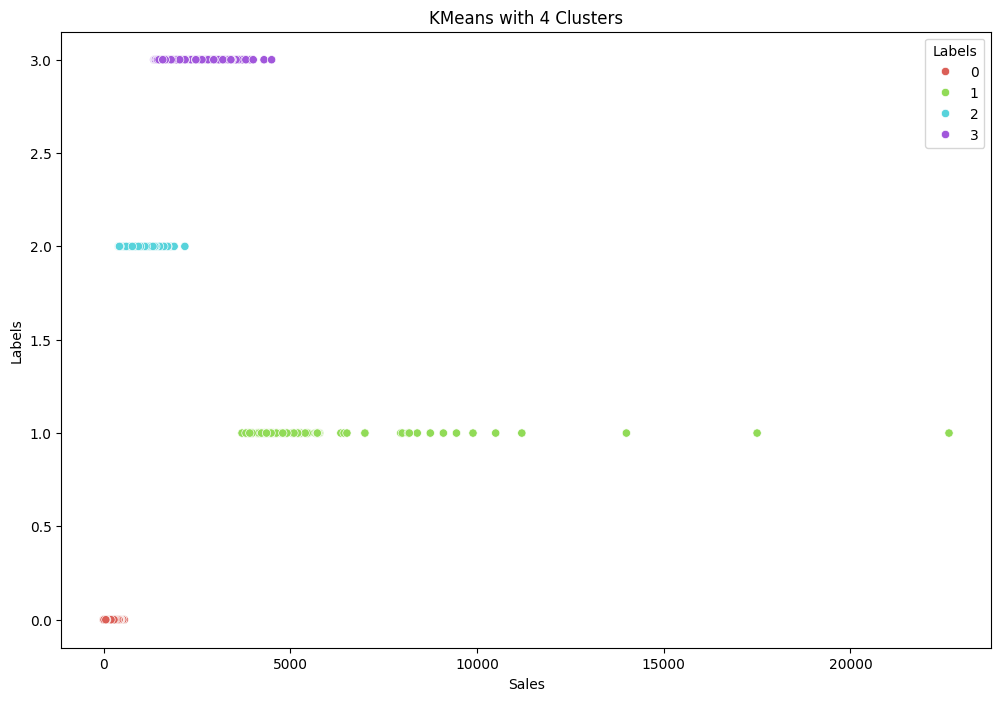

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=km['Sales'], y=km['Labels'], hue=km['Labels'], palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

# Algomerative / Hirarki anlyisys cluster


In [ ]:
hirarki = data_ready.copy()
hirarki.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2309.650,7.0,0.0,762.1845,933.57
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3709.395,9.0,0.1,-288.7650,923.63
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5175.171,9.0,0.1,919.9710,915.49
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2892.510,5.0,0.1,-96.5400,910.16
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2832.960,8.0,0.0,311.5200,903.04


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#k = 4

# Menginisialisasi model Hierarchical Agglomerative Clustering
#agg_clustering = AgglomerativeClustering(n_clusters=k)

# Melakukan clustering
#agg_clustering.fit(hirarki)

# Menampilkan label cluster untuk setiap hirarki
##print(agg_clustering.labels_)

# DB SCAN

In [ ]:
db_scan = data_ready.copy()
db_scan

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Sales,Quantity,Discount,Profit,Shipping Cost
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2309.650,7.0,0.0,762.1845,933.57
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3709.395,9.0,0.1,-288.7650,923.63
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5175.171,9.0,0.1,919.9710,915.49
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2892.510,5.0,0.1,-96.5400,910.16
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2832.960,8.0,0.0,311.5200,903.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,65.100,5.0,0.0,4.5000,0.01
51280,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.444,1.0,0.8,-1.1100,0.01
51281,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.920,3.0,0.0,11.2308,0.01
51282,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.440,2.0,0.0,2.4000,0.00


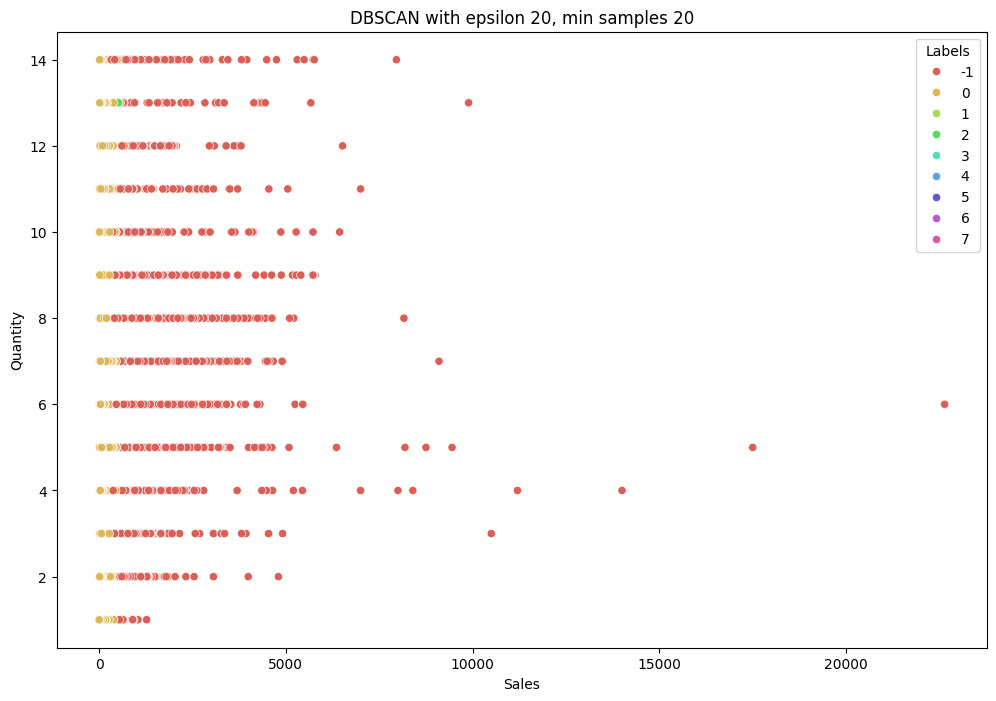

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=20, min_samples=20).fit(db_scan)

db_scan['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=db_scan['Sales'], y=db_scan['Quantity'], hue=db_scan['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 20, min samples 20')
plt.show()

# Evaluasi Sillhoute score


In [ ]:
data_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51284 entries, 0 to 51283
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ship Mode_First Class     51284 non-null  float64
 1   Ship Mode_Same Day        51284 non-null  float64
 2   Ship Mode_Second Class    51284 non-null  float64
 3   Ship Mode_Standard Class  51284 non-null  float64
 4   Segment_Consumer          51284 non-null  float64
 5   Segment_Corporate         51284 non-null  float64
 6   Segment_Home Office       51284 non-null  float64
 7   Category_Furniture        51284 non-null  float64
 8   Category_Office Supplies  51284 non-null  float64
 9   Category_Technology       51284 non-null  float64
 10  Order Priority_Critical   51284 non-null  float64
 11  Order Priority_High       51284 non-null  float64
 12  Order Priority_Low        51284 non-null  float64
 13  Order Priority_Medium     51284 non-null  float64
 14  Sales 

In [ ]:
from sklearn.metrics import silhouette_score

# data dan label hasil clustering
data = data_ready
labels = kmeans.fit_predict(data_ready)

# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(data, labels)

print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.8367676502963356


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for K=2: 0.8367676502963356


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for K=3: 0.7645405417000842


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for K=4: 0.7300059350628381


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for K=5: 0.6950162843373155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for K=6: 0.6459632902734874


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for K=7: 0.6220538701891573


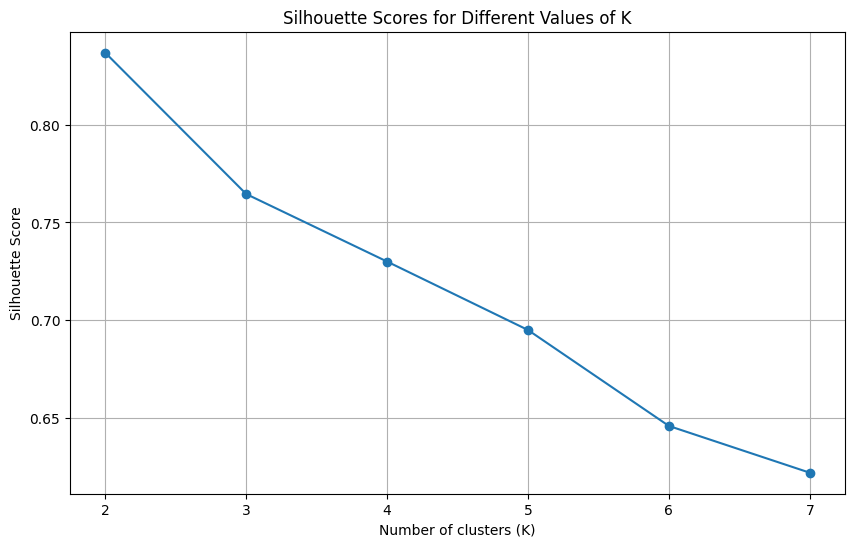

In [ ]:
k_values = range(2, 8)

# List to store silhouette scores
silhouette_scores = []

# Perform clustering and silhouette analysis for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(data_ready)
    silhouette_avg = silhouette_score(data_ready, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for K={k}: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()